<a href="https://colab.research.google.com/github/varuntirthani/TimeSeriesFinalProject/blob/main/vyt2006_Time_Series_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#@title Fetch Stock And Market Data

low_volatility_stocks = ["IBM", "ORCL", "JNJ", "PG", "KO", "PEP", "MCD", "WMT", "T", "VZ"]  # Example low-volatility stocks
high_volatility_stocks = ["AIG", "GM", "BA", "NKE", "WFC", "SLB", "GS", "C", "MRO", "DIS"]  # Example high-volatility stocks
small_cap_stocks = ["NKE", "WMT"]  # Example small-cap stocks
large_cap_stocks = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"] # Example large-cap stocks
benchmark = "^GSPC"  # S&P 500 index
start_date = "2009-01-01"
end_date = "2023-12-31"

# Fetch stock and market data
low_volatility_data = yf.download(low_volatility_stocks + [benchmark], start=start_date, end=end_date)['Adj Close']
low_volatility_data = low_volatility_data.dropna()
high_volatility_data = yf.download(high_volatility_stocks + [benchmark], start=start_date, end=end_date)['Adj Close']
high_volatility_data = high_volatility_data.dropna()
small_cap_data = yf.download(small_cap_stocks + [benchmark], start=start_date, end=end_date)['Adj Close']
small_cap_data = small_cap_data.dropna()
large_cap_data = yf.download(large_cap_stocks + [benchmark], start=start_date, end=end_date)['Adj Close']
large_cap_data = large_cap_data.dropna()
data_benchmark = low_volatility_data[benchmark]
low_volatility_data_stocks = low_volatility_data[low_volatility_stocks]
high_volatility_data_stocks = high_volatility_data[high_volatility_stocks]
small_cap_data_stocks = small_cap_data[small_cap_stocks]
large_cap_data_stocks = large_cap_data[large_cap_stocks]

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  6 of 6 completed


In [ ]:
#@title Calculate Returns, Beta And Volatility

# Calculate daily returns
low_volatility_stocks_returns = low_volatility_data_stocks.pct_change().dropna()
high_volatility_stocks_returns = high_volatility_data_stocks.pct_change().dropna()
small_cap_stocks_returns = small_cap_data_stocks.pct_change().dropna()
large_cap_stocks_returns = large_cap_data_stocks.pct_change().dropna()
market_returns = data_benchmark.pct_change().dropna()

# Calculate Beta and Volatility for Each Stock
og_betas = []
betas_low_volatility = []
betas_high_volatility = []
betas_small_cap = []
betas_large_cap = []
volatilities_low = []
volatilities_high = []
volatilities_small_cap = []
volatilities_large_cap = []

for stock in low_volatility_stocks:
    # Get the stock's returns and align with market returns
    low_volatility_stock_returns = low_volatility_stocks_returns[stock]
    aligned_returns = low_volatility_stock_returns.loc[low_volatility_stock_returns.index.isin(market_returns.index)]
    aligned_market_returns = market_returns.loc[market_returns.index.isin(low_volatility_stock_returns.index)]

    # Calculate Beta
    low_volatility_beta = np.cov(aligned_returns, aligned_market_returns)[0, 1] / np.var(aligned_market_returns)
    og_betas.append((stock, low_volatility_beta))
    betas_low_volatility.append(low_volatility_beta)

    # Calculate Volatility
    volatilities_low.append(low_volatility_stock_returns.std())

for stock in high_volatility_stocks:
    # Get the stock's returns and align with market returns
    high_volatility_stock_returns = high_volatility_stocks_returns[stock]
    aligned_returns = high_volatility_stock_returns.loc[high_volatility_stock_returns.index.isin(market_returns.index)]
    aligned_market_returns = market_returns.loc[market_returns.index.isin(high_volatility_stock_returns.index)]

    # Calculate Beta
    high_volatility_beta = np.cov(aligned_returns, aligned_market_returns)[0, 1] / np.var(aligned_market_returns)
    og_betas.append((stock, high_volatility_beta))
    betas_high_volatility.append(high_volatility_beta)

    # Calculate Volatility
    volatilities_high.append(high_volatility_stock_returns.std())

for stock in small_cap_stocks:
    #Get the stock's returns and align with market returns
    small_cap_stock_returns = small_cap_stocks_returns[stock]
    aligned_returns = small_cap_stock_returns.loc[small_cap_stock_returns.index.isin(market_returns.index)]
    aligned_market_returns = market_returns.loc[market_returns.index.isin(small_cap_stock_returns.index)]

    # Calculate Beta
    small_cap_beta = np.cov(aligned_returns, aligned_market_returns)[0, 1] / np.var(aligned_market_returns)
    betas_small_cap.append(small_cap_beta)

    # Calculate Volatility
    volatilities_small_cap.append(high_volatility_stock_returns.std())

for stock in large_cap_stocks:
    #Get the stock's returns and align with market returns
    large_cap_stock_returns = large_cap_stocks_returns[stock]
    aligned_returns = large_cap_stock_returns.loc[large_cap_stock_returns.index.isin(market_returns.index)]
    aligned_market_returns = market_returns.loc[market_returns.index.isin(large_cap_stock_returns.index)]

    # Calculate Beta
    large_cap_beta = np.cov(aligned_returns, aligned_market_returns)[0, 1] / np.var(aligned_market_returns)
    betas_large_cap.append(large_cap_beta)

    # Calculate Volatility
    volatilities_large_cap.append(large_cap_stock_returns.std())

pre_paper_low_volatility_stocks_returns = low_volatility_stocks_returns.loc['2009-01-01':'2012-12-31']
pre_paper_high_volatility_stocks_returns = high_volatility_stocks_returns.loc['2009-01-01':'2012-12-31']
post_paper_high_volatility_stocks_returns = high_volatility_stocks_returns.loc['2013-01-01':'2023-12-31']
post_paper_low_volatility_stocks_returns = low_volatility_stocks_returns.loc['2013-01-01':'2023-12-31']

print(og_betas)
print(low_volatility_stocks_returns)
print(high_volatility_stocks_returns)
print(small_cap_stocks_returns)
print(large_cap_stocks_returns)
print(pre_paper_low_volatility_stocks_returns)
print(pre_paper_high_volatility_stocks_returns)
print(post_paper_high_volatility_stocks_returns)
print(post_paper_low_volatility_stocks_returns)

[('IBM', 0.8009680607975647), ('ORCL', 0.9723777883786806), ('JNJ', 0.5512416546665126), ('PG', 0.5591979688314646), ('KO', 0.5882384177416577), ('PEP', 0.5891200462681413), ('MCD', 0.6289157331902377), ('WMT', 0.47372030767982354), ('T', 0.6480558397275227), ('VZ', 0.5254489410908676), ('AIG', 1.2738086659185028), ('GM', 1.2467139263463554), ('BA', 1.3096784312986143), ('NKE', 1.0018565320592057), ('WFC', 1.2007778773150246), ('SLB', 1.202643461252621), ('GS', 1.2244726346603432), ('C', 1.4443506517610112), ('MRO', 1.4071416278518913), ('DIS', 1.0254884610679904)]
Ticker           IBM      ORCL       JNJ        PG        KO       PEP  \
Date                                                                     
2009-01-05 -0.006295 -0.017382 -0.009893 -0.007165 -0.010022 -0.006611   
2009-01-06  0.027758  0.016584 -0.005995 -0.002887 -0.016065  0.001799   
2009-01-07 -0.016138 -0.040240 -0.009382 -0.017533  0.004921 -0.032495   
2009-01-08 -0.006948 -0.001699 -0.001860 -0.010969  0.0068

In [ ]:
#@title Low Volatility Stocks Data Description

# Describing the data: Summary statistics for returns
low_volatility_stocks_summary_stats = low_volatility_stocks_returns.describe().T
low_volatility_stocks_summary_stats = low_volatility_stocks_summary_stats.drop(['25%', '50%', '75%'], axis=1)
low_volatility_stocks_summary_stats['Skewness'] = low_volatility_stocks_returns.skew()
low_volatility_stocks_summary_stats['Kurtosis'] = low_volatility_stocks_returns.kurtosis()

# Include whether returns are adjusted (with dividends) or not
adjustment_type = "Adjusted for dividends" if 'Adj Close' in low_volatility_data.columns.name else "Not adjusted for dividends"
print(f"Data Adjustment Type: {adjustment_type}")

print("\nLow Volatility Stocks Summary Statistics:")
print(low_volatility_stocks_summary_stats)

Data Adjustment Type: Not adjusted for dividends

Low Volatility Stocks Summary Statistics:
         count      mean       std       min       max  Skewness   Kurtosis
Ticker                                                                     
IBM     3773.0  0.000415  0.014189 -0.128507  0.115150 -0.285360   9.642367
ORCL    3773.0  0.000658  0.016929 -0.134954  0.204271  0.285320  14.528674
JNJ     3773.0  0.000425  0.010625 -0.100379  0.079977 -0.172647   8.791886
PG      3773.0  0.000405  0.011206 -0.087374  0.120091  0.112800  10.574287
KO      3773.0  0.000436  0.011142 -0.096725  0.075599 -0.464727   8.275866
PEP     3773.0  0.000473  0.011147 -0.114283  0.129366 -0.126837  17.879602
MCD     3773.0  0.000591  0.011910 -0.158753  0.181254  0.379215  28.904585
WMT     3773.0  0.000432  0.012274 -0.113757  0.117085  0.010775  15.055298
T       3773.0  0.000313  0.013211 -0.104061  0.100223 -0.252477   8.153666
VZ      3773.0  0.000308  0.011832 -0.074978  0.092705  0.095087   4.875

In [ ]:
#@title High Volatility Stocks Data Description

# Describing the data: Summary statistics for returns
high_volatility_stocks_summary_stats = high_volatility_stocks_returns.describe().T
high_volatility_stocks_summary_stats = high_volatility_stocks_summary_stats.drop(['25%', '50%', '75%'], axis=1)
high_volatility_stocks_summary_stats['Skewness'] = high_volatility_stocks_returns.skew()
high_volatility_stocks_summary_stats['Kurtosis'] = high_volatility_stocks_returns.kurtosis()

# Include whether returns are adjusted (with dividends) or not
adjustment_type = "Adjusted for dividends" if 'Adj Close' in high_volatility_data.columns.name else "Not adjusted for dividends"
print(f"Data Adjustment Type: {adjustment_type}")

print("\nHigh Volatility Stocks Summary Statistics:")
print(high_volatility_stocks_summary_stats)

Data Adjustment Type: Not adjusted for dividends

High Volatility Stocks Summary Statistics:
         count      mean       std       min       max  Skewness   Kurtosis
Ticker                                                                     
AIG     3299.0  0.000488  0.020885 -0.208449  0.188083 -0.257269  12.216977
GM      3299.0  0.000333  0.021718 -0.173228  0.199432  0.158252   6.856803
BA      3299.0  0.000751  0.022799 -0.238484  0.243186  0.220700  19.655472
NKE     3299.0  0.000705  0.017568 -0.128081  0.155314  0.448872  10.935878
WFC     3299.0  0.000460  0.018670 -0.158676  0.145346 -0.027976   8.560839
SLB     3299.0  0.000257  0.023331 -0.274214  0.199080 -0.211360  11.757127
GS      3299.0  0.000485  0.018019 -0.127053  0.175803  0.072528   8.154125
C       3299.0  0.000356  0.021442 -0.192986  0.179843 -0.087409  10.467931
MRO     3299.0  0.000603  0.030778 -0.468521  0.232446 -0.512740  20.630774
DIS     3299.0  0.000445  0.016515 -0.131632  0.144123  0.164313  10.70

In [ ]:
#@title Low Volatility Stocks Portoflio Returns Pre & Post Paper

# Create a DataFrame with metrics
betas = betas_low_volatility + betas_high_volatility
volatilities = volatilities_low + volatilities_high
stocks = low_volatility_stocks + high_volatility_stocks
cap_stocks = small_cap_stocks + large_cap_stocks
cap_betas = betas_small_cap + betas_large_cap
cap_volatilities = volatilities_small_cap + volatilities_large_cap

metrics = pd.DataFrame({
    "Stock": stocks,
    "Beta": betas,
    "Volatility": volatilities
})
metrics = metrics.sort_values(by="Beta")

cap_metrics = pd.DataFrame({
    "Stock": cap_stocks,
    "Beta": cap_betas,
    "Volatility": cap_volatilities
})
cap_metrics = cap_metrics.sort_values(by="Beta")

# Select Low Beta and Low Volatility Stocks
low_beta_stocks = metrics.nsmallest(5, "Beta")["Stock"].tolist()
low_volatility_stocks = metrics.nsmallest(5, "Volatility")["Stock"].tolist()

# Portfolio returns for low beta and low volatility stocks
portfolio_returns_low_beta = low_volatility_stocks_returns[low_beta_stocks].mean(axis=1)
portfolio_returns_low_volatility = low_volatility_stocks_returns[low_volatility_stocks].mean(axis=1)
pre_paper_portfolio_returns_low_volatility = pre_paper_low_volatility_stocks_returns[low_volatility_stocks].mean(axis=1)
post_paper_portfolio_returns_low_volatility = post_paper_low_volatility_stocks_returns[low_volatility_stocks].mean(axis=1)

print("Low Beta Stocks:", low_beta_stocks)
print("Low Volatility Stocks:", low_volatility_stocks)

print("Portfolio Returns (Low Beta):\n", portfolio_returns_low_beta)
print("Portfolio Returns (Low Volatility):\n", portfolio_returns_low_volatility)
print("Pre-Paper Portfolio Returns (Low Volatility):\n", pre_paper_portfolio_returns_low_volatility)
print("Post-Paper Portfolio Returns (Low Volatility):\n", post_paper_portfolio_returns_low_volatility)

Low Beta Stocks: ['WMT', 'VZ', 'JNJ', 'PG', 'KO']
Low Volatility Stocks: ['JNJ', 'KO', 'PEP', 'PG', 'VZ']
Portfolio Returns (Low Beta):
 Date
2009-01-05   -0.020196
2009-01-06   -0.009961
2009-01-07   -0.003573
2009-01-08   -0.013094
2009-01-09   -0.005190
                ...   
2023-12-22    0.006064
2023-12-26    0.002247
2023-12-27    0.001918
2023-12-28    0.000551
2023-12-29    0.003151
Length: 3773, dtype: float64
Portfolio Returns (Low Volatility):
 Date
2009-01-05   -0.019209
2009-01-06   -0.007832
2009-01-07   -0.008358
2009-01-08   -0.000489
2009-01-09   -0.008523
                ...   
2023-12-22    0.004524
2023-12-26    0.003961
2023-12-27    0.000678
2023-12-28    0.000932
2023-12-29    0.003580
Length: 3773, dtype: float64
Pre-Paper Portfolio Returns (Low Volatility):
 Date
2009-01-05   -0.019209
2009-01-06   -0.007832
2009-01-07   -0.008358
2009-01-08   -0.000489
2009-01-09   -0.008523
                ...   
2012-12-24   -0.002873
2012-12-26   -0.004890
2012-12-27   -0.

In [ ]:
#@title Portfolio Returns For Small And Large Cap Stocks

portfolio_returns_small_caps = small_cap_stocks_returns.mean(axis=1)
portfolio_returns_large_caps = large_cap_stocks_returns.mean(axis=1)

print("Portfolio Returns (Small Cap):\n", portfolio_returns_small_caps)
print("Portfolio Returns (Large Cap):\n", portfolio_returns_large_caps)

Portfolio Returns (Small Cap):
 Date
2009-01-05   -0.002190
2009-01-06   -0.014528
2009-01-07   -0.022428
2009-01-08   -0.028235
2009-01-09   -0.015372
                ...   
2023-12-22   -0.053153
2023-12-26   -0.000859
2023-12-27    0.000580
2023-12-28    0.006906
2023-12-29   -0.000895
Length: 3773, dtype: float64
Portfolio Returns (Large Cap):
 Date
2010-06-30   -0.009601
2010-07-01   -0.016158
2010-07-02   -0.030045
2010-07-06   -0.024626
2010-07-07    0.020862
                ...   
2023-12-22   -0.001341
2023-12-26    0.002825
2023-12-27    0.001529
2023-12-28   -0.005401
2023-12-29   -0.006766
Length: 3399, dtype: float64


In [ ]:
#@title High Volatility Stocks Portoflio Returns Pre & Post Paper

# Select High Beta and High Volatility Stocks
high_beta_stocks = metrics.nlargest(5, "Beta")["Stock"].tolist()
high_volatility_stocks = metrics.nlargest(5, "Volatility")["Stock"].tolist()

# Portfolio returns for high beta and high volatility stocks
portfolio_returns_high_beta = high_volatility_stocks_returns[high_beta_stocks].mean(axis=1)
portfolio_returns_high_volatility = high_volatility_stocks_returns[high_volatility_stocks].mean(axis=1)
pre_paper_portfolio_returns_high_volatility = pre_paper_high_volatility_stocks_returns[high_volatility_stocks].mean(axis=1)
post_paper_portfolio_returns_high_volatility = post_paper_high_volatility_stocks_returns[high_volatility_stocks].mean(axis=1)

print("High Beta Stocks:", high_beta_stocks)
print("High Volatility Stocks:", high_volatility_stocks)

print("Portfolio Returns (High Beta):\n", portfolio_returns_high_beta)
print("Portfolio Returns (High Volatility):\n", portfolio_returns_high_volatility)
print("Pre-Paper Portfolio Returns (High Volatility):\n", pre_paper_portfolio_returns_high_volatility)
print("Post-Paper Portfolio Returns (High Volatility):\n", post_paper_portfolio_returns_high_volatility)

High Beta Stocks: ['C', 'MRO', 'BA', 'AIG', 'GM']
High Volatility Stocks: ['MRO', 'SLB', 'BA', 'GM', 'C']
Portfolio Returns (High Beta):
 Date
2010-11-19   -0.002700
2010-11-22   -0.006469
2010-11-23   -0.021878
2010-11-24    0.017766
2010-11-26   -0.007109
                ...   
2023-12-22   -0.000932
2023-12-26    0.009040
2023-12-27   -0.002661
2023-12-28   -0.002075
2023-12-29   -0.003778
Length: 3299, dtype: float64
Portfolio Returns (High Volatility):
 Date
2010-11-19   -0.001035
2010-11-22   -0.003786
2010-11-23   -0.018269
2010-11-24    0.017844
2010-11-26   -0.007699
                ...   
2023-12-22   -0.000112
2023-12-26    0.010703
2023-12-27   -0.005142
2023-12-28   -0.007199
2023-12-29   -0.004190
Length: 3299, dtype: float64
Pre-Paper Portfolio Returns (High Volatility):
 Date
2010-11-19   -0.001035
2010-11-22   -0.003786
2010-11-23   -0.018269
2010-11-24    0.017844
2010-11-26   -0.007699
                ...   
2012-12-24   -0.002089
2012-12-26   -0.001247
2012-12-27   

In [ ]:
#@title Portfolio Volatility

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [ ]:
#@title # Minimum Variance Optimization For Low Volatility

# Covariance matrix of returns
low_vol_cov_matrix = low_volatility_stocks_returns[low_volatility_stocks].cov()
low_vol_num_stocks = len(low_volatility_stocks)
initial_weights = np.array([1/low_vol_num_stocks] * low_vol_num_stocks)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(low_vol_num_stocks)]

# Optimize portfolio weights
opt_result = minimize(portfolio_volatility, initial_weights, args=(low_vol_cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
low_vol_min_variance_weights = opt_result.x

print("Minimum Variance Low Volatility Stocks Portfolio Weights:", low_vol_min_variance_weights)

Minimum Variance Low Volatility Stocks Portfolio Weights: [0.29525802 0.16637491 0.12837808 0.16022004 0.24976896]


In [ ]:
#@title # Minimum Variance Optimization For High Volatility

# Covariance matrix of returns
high_vol_cov_matrix = high_volatility_stocks_returns[high_volatility_stocks].cov()
high_vol_num_stocks = len(low_volatility_stocks)
initial_weights = np.array([1/high_vol_num_stocks] * high_vol_num_stocks)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(high_vol_num_stocks)]

# Optimize portfolio weights
opt_result = minimize(portfolio_volatility, initial_weights, args=(high_vol_cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
high_vol_min_variance_weights = opt_result.x

print("Minimum Variance High Volatility Stocks Portfolio Weights:", high_vol_min_variance_weights)

Minimum Variance High Volatility Stocks Portfolio Weights: [6.93889390e-18 1.85750773e-01 2.70886701e-01 2.93845077e-01
 2.49517449e-01]


In [ ]:
#@title # Minimum Variance Optimization For Small Caps

portfolio_returns_small_caps = small_cap_stocks_returns.mean(axis=1)

# Covariance matrix of returns
small_cap_cov_matrix = small_cap_stocks_returns.cov()
small_cap_num_stocks = len(small_cap_stocks)
initial_weights = np.array([1/small_cap_num_stocks] * small_cap_num_stocks)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(small_cap_num_stocks)]

# Optimize portfolio weights
opt_result = minimize(portfolio_volatility, initial_weights, args=(small_cap_cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
small_cap_min_variance_weights = opt_result.x

print("Minimum Variance Small Cap Stocks Portfolio Weights:", small_cap_min_variance_weights)

Minimum Variance Small Cap Stocks Portfolio Weights: [0.25780634 0.74219366]


In [ ]:
#@title # Minimum Variance Optimization For Large Caps

portfolio_returns_large_caps = large_cap_stocks_returns.mean(axis=1)

# Covariance matrix of returns
large_cap_cov_matrix = large_cap_stocks_returns.cov()
large_cap_num_stocks = len(large_cap_stocks)
initial_weights = np.array([1/large_cap_num_stocks] * large_cap_num_stocks)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(large_cap_num_stocks)]

# Optimize portfolio weights
opt_result = minimize(portfolio_volatility, initial_weights, args=(large_cap_cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
large_cap_min_variance_weights = opt_result.x

print("Minimum Variance Large Cap Stocks Portfolio Weights:", large_cap_min_variance_weights)

Minimum Variance Large Cap Stocks Portfolio Weights: [3.07816035e-01 3.44626203e-01 2.76328200e-01 7.12295624e-02
 2.16840434e-18]


In [ ]:
#@title # Portfolio Performance
def calculate_portfolio_performance(weights, returns):
    portfolio_return = np.dot(weights, returns.mean())
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(low_vol_cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

In [ ]:
#@title # "Betting Against Beta" (BAB) Strategy
# Adjust weights inversely proportional to beta and align with stock tickers
low_vol_bab_weights = pd.Series(1 / metrics.set_index("Stock").loc[low_volatility_stocks, "Beta"])
low_vol_bab_weights /= low_vol_bab_weights.sum()

high_vol_bab_weights = pd.Series(1 / metrics.set_index("Stock").loc[high_volatility_stocks, "Beta"])
high_vol_bab_weights /= high_vol_bab_weights.sum()

small_cap_bab_weights = pd.Series(1 / cap_metrics.set_index("Stock").loc[small_cap_stocks, "Beta"])
small_cap_bab_weights /= small_cap_bab_weights.sum()

large_cap_bab_weights = pd.Series(1 / cap_metrics.set_index("Stock").loc[large_cap_stocks, "Beta"])
large_cap_bab_weights /= large_cap_bab_weights.sum()

In [ ]:
#@title Portfolio Returns Calculation

low_volatility_stocks_returns = low_volatility_stocks_returns[low_volatility_stocks]
high_volatility_stocks_returns = high_volatility_stocks_returns[high_volatility_stocks]
pre_paper_low_volatility_stocks_returns = pre_paper_low_volatility_stocks_returns[low_volatility_stocks]
pre_paper_high_volatility_stocks_returns = pre_paper_high_volatility_stocks_returns[high_volatility_stocks]
post_paper_low_volatility_stocks_returns = post_paper_low_volatility_stocks_returns[low_volatility_stocks]
post_paper_high_volatility_stocks_returns = post_paper_high_volatility_stocks_returns[high_volatility_stocks]
small_cap_stock_returns = small_cap_stocks_returns[small_cap_stocks]
large_cap_stock_returns = large_cap_stocks_returns[large_cap_stocks]

# Weighted returns for each stock
low_vol_weighted_returns = low_volatility_stocks_returns.mul(low_vol_bab_weights, axis=1)
high_vol_weighted_returns = high_volatility_stocks_returns.mul(high_vol_bab_weights, axis=1)
pre_paper_low_vol_bab_portfolio_returns = pre_paper_low_volatility_stocks_returns.mul(low_vol_bab_weights, axis=1)
pre_paper_high_vol_bab_portfolio_returns = pre_paper_high_volatility_stocks_returns.mul(high_vol_bab_weights, axis=1)
post_paper_low_vol_bab_portfolio_returns = post_paper_low_volatility_stocks_returns.mul(low_vol_bab_weights, axis=1)
post_paper_high_vol_bab_portfolio_returns = post_paper_high_volatility_stocks_returns.mul(high_vol_bab_weights, axis=1)
small_cap_bab_weighted_returns = small_cap_stocks_returns.mul(small_cap_bab_weights, axis=1)
large_cap_bab_weighted_returns = large_cap_stocks_returns.mul(large_cap_bab_weights, axis=1)

# Portfolio returns (sum of weighted returns for each date)
low_vol_bab_portfolio_returns = low_vol_weighted_returns.sum(axis=1)
high_vol_bab_portfolio_returns = high_vol_weighted_returns.sum(axis=1)
pre_paper_low_vol_bab_portfolio_returns = pre_paper_low_vol_bab_portfolio_returns.sum(axis=1)
pre_paper_high_vol_bab_portfolio_returns =  pre_paper_high_vol_bab_portfolio_returns.sum(axis=1)
post_paper_low_vol_bab_portfolio_returns = post_paper_low_vol_bab_portfolio_returns.sum(axis=1)
post_paper_high_vol_bab_portfolio_returns = post_paper_high_vol_bab_portfolio_returns.sum(axis=1)
small_cap_bab_portfolio_returns = small_cap_bab_weighted_returns.sum(axis=1)
large_cap_bab_portfolio_returns = large_cap_bab_weighted_returns.sum(axis=1)

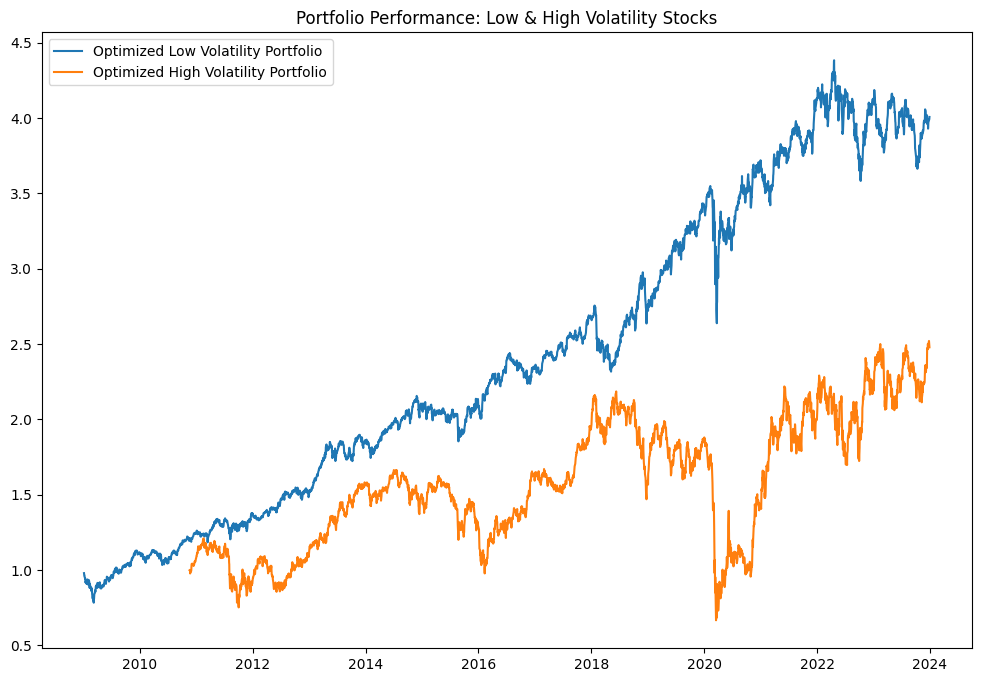

In [ ]:
#@title # Evaluation (Portfolio Performace Across Volatilities)
plt.figure(figsize=(12, 8))
plt.plot((1 + low_vol_bab_portfolio_returns).cumprod(), label="Optimized Low Volatility Portfolio")
plt.plot((1 + high_vol_bab_portfolio_returns).cumprod(), label="Optimized High Volatility Portfolio")
plt.title("Portfolio Performance: Low & High Volatility Stocks")
plt.legend()
plt.show()

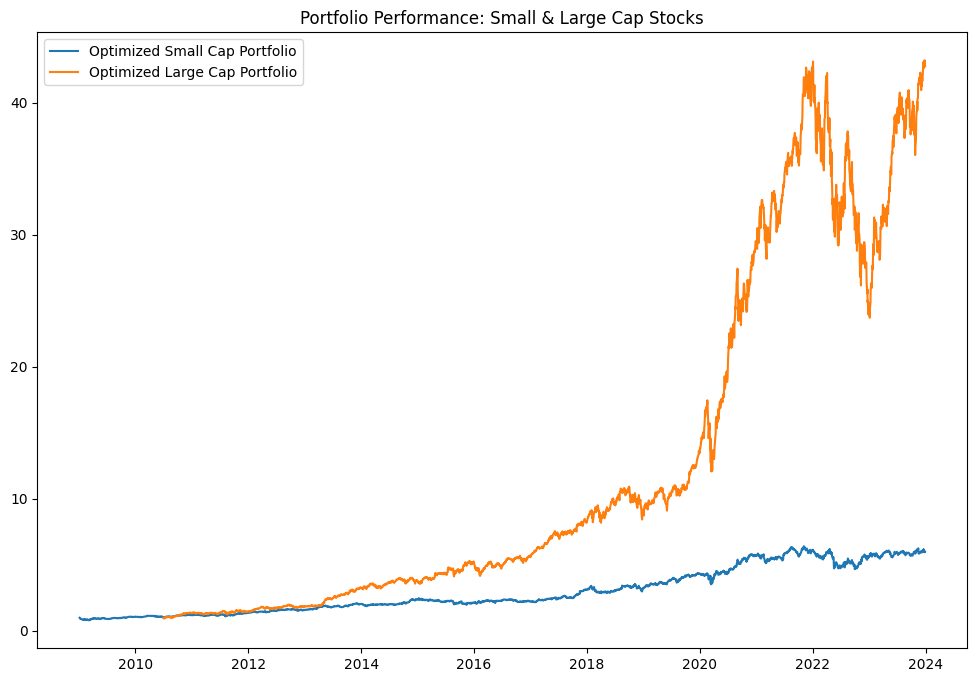

In [ ]:
#@title # Evaluation (Portfolio Performace Across Market Caps)
plt.figure(figsize=(12, 8))
plt.plot((1 + small_cap_bab_portfolio_returns).cumprod(), label="Optimized Small Cap Portfolio")
plt.plot((1 + large_cap_bab_portfolio_returns).cumprod(), label="Optimized Large Cap Portfolio")
plt.title("Portfolio Performance: Small & Large Cap Stocks")
plt.legend()
plt.show()

In [ ]:
#@title # Evaluation (Sharpe Ratio)
# Sharpe Ratio Calculation
risk_free_rate = 0.02 / 252  # Approx daily risk-free rate


sharpe_low_volatility = (portfolio_returns_low_volatility.mean() - risk_free_rate) / portfolio_returns_low_volatility.std()
sharpe_bab_low = (low_vol_bab_portfolio_returns.mean() - risk_free_rate) / portfolio_returns_low_volatility.std()
sharpe_bab_high = (high_vol_bab_portfolio_returns.mean() - risk_free_rate) / portfolio_returns_low_volatility.std()
sharpe_bab_small_cap = (small_cap_bab_portfolio_returns.mean() - risk_free_rate) / portfolio_returns_low_volatility.std()
sharpe_bab_large_cap = (large_cap_bab_portfolio_returns.mean() - risk_free_rate) / portfolio_returns_low_volatility.std()

pre_paper_sharpe_bab_low = (pre_paper_low_vol_bab_portfolio_returns.mean() - risk_free_rate) / pre_paper_portfolio_returns_low_volatility.std()
pre_paper_sharpe_bab_high = (pre_paper_high_vol_bab_portfolio_returns.mean() - risk_free_rate) / pre_paper_portfolio_returns_high_volatility.std()
post_paper_sharpe_bab_low = (post_paper_low_vol_bab_portfolio_returns.mean() - risk_free_rate) / post_paper_portfolio_returns_low_volatility.std()
post_paper_sharpe_bab_high = (post_paper_high_vol_bab_portfolio_returns.mean() - risk_free_rate) / post_paper_portfolio_returns_high_volatility.std()


print("Sharpe Ratio (Low Volatility BAB):", sharpe_bab_low)
print("Sharpe Ratio (High Volatility BAB):", sharpe_bab_high)
print("Sharpe Ratio (Small Cap BAB):", sharpe_bab_small_cap)
print("Sharpe Ratio (Large Cap BAB):", sharpe_bab_large_cap)
print("Pre Paper Sharpe Ratio (Low Volatility BAB):", pre_paper_sharpe_bab_low)
print("Pre Paper Sharpe Ratio (High Volatility BAB):", pre_paper_sharpe_bab_high)
print("Post Paper Sharpe Ratio (Low Volatility BAB):", post_paper_sharpe_bab_low)
print("Post Paper Sharpe Ratio (High Volatility BAB):", post_paper_sharpe_bab_high)

Sharpe Ratio (Low Volatility BAB): 0.036897402137632575
Sharpe Ratio (High Volatility BAB): 0.042284310927619556
Sharpe Ratio (Small Cap BAB): 0.05181807628348346
Sharpe Ratio (Large Cap BAB): 0.12956322299164835
Pre Paper Sharpe Ratio (Low Volatility BAB): 0.04225292906892447
Pre Paper Sharpe Ratio (High Volatility BAB): 0.01540460426977754
Post Paper Sharpe Ratio (Low Volatility BAB): 0.035089725925575584
Post Paper Sharpe Ratio (High Volatility BAB): 0.02063703025003644


In [ ]:
#@title # Net Beta Calculation
# Convert og_betas to a dictionary for easy lookup
og_betas_dict = dict(og_betas)

# Extract betas for low-volatility stocks in the portfolio
low_beta_stocks = low_vol_bab_weights.index
low_beta_values = [og_betas_dict[stock] for stock in low_beta_stocks]

# Extract betas for high-volatility stocks in the portfolio
high_beta_stocks = high_vol_bab_weights.index
high_beta_values = [og_betas_dict[stock] for stock in high_beta_stocks]

# Convert to Pandas Series for easy operations
low_vol_betas = pd.Series(low_beta_values, index=low_beta_stocks)
high_vol_betas = pd.Series(high_beta_values, index=high_beta_stocks)

# Calculate net beta of the BAB portfolio
net_beta = (low_vol_bab_weights @ low_vol_betas) - (high_vol_bab_weights @ high_vol_betas)

print(f"Net Beta of the BAB Portfolio: {net_beta}")

Net Beta of the BAB Portfolio: -0.7541181421943746


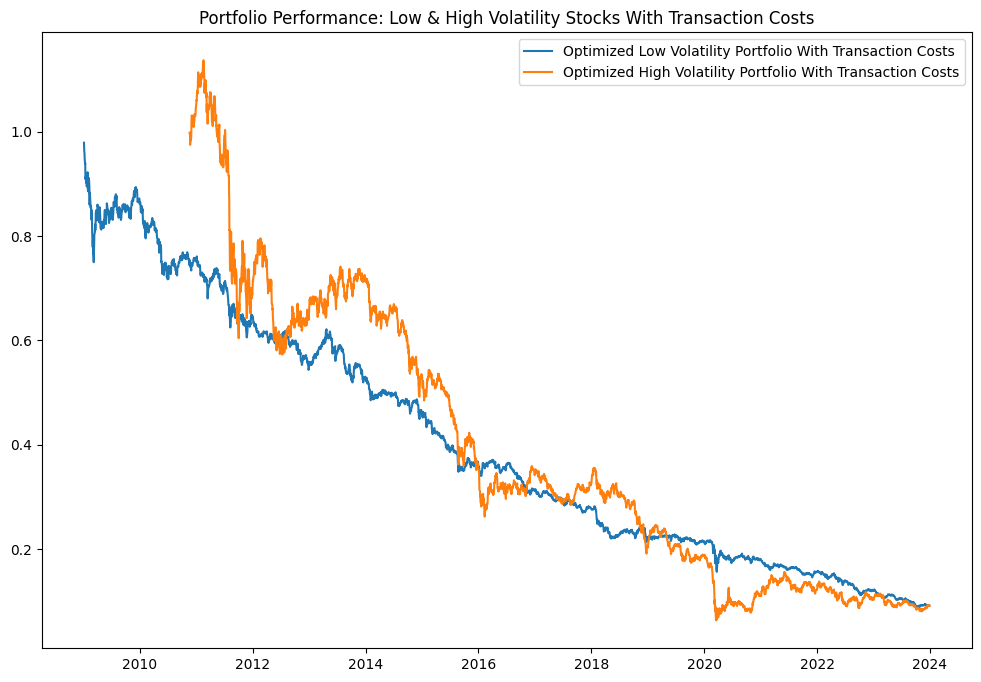

In [ ]:
#@title # Simulating Transaction Costs

transaction_cost = 0.001  # 0.1% per transaction

# Apply transaction costs to portfolio returns
low_portfolio_returns_with_costs = low_vol_bab_portfolio_returns - transaction_cost
high_portfolio_returns_with_costs = high_vol_bab_portfolio_returns - transaction_cost

plt.figure(figsize=(12, 8))
plt.plot((1+low_portfolio_returns_with_costs).cumprod(), label="Optimized Low Volatility Portfolio With Transaction Costs")
plt.plot((1+high_portfolio_returns_with_costs).cumprod(), label="Optimized High Volatility Portfolio With Transaction Costs")
plt.title("Portfolio Performance: Low & High Volatility Stocks With Transaction Costs")
plt.legend()
plt.show()